In [1]:
import pandas as pd
import numpy as np
print("Ambiente OK")

Ambiente OK


In [2]:
pip install yfinance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ------------------------------------- 949.2/949.2 kB 39.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 48.2 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15618 sha256=3b2c17948e72812710015992cf3a1e1e5e1f8e95a3270dbd11600e13eaf58200
  Stored in directory: c:\users\guiga\appdata\local\pip\cache\wheels\1e\df\0f\e2bbb22d689b30c681feb5410ab6

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334


C:\Users\guiga\AppData\Local\Temp\ipykernel_1084\1748266014.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download("BTC-USD", start="2020-01-01", end="2025-06-01")
[*********************100%***********************]  1 of 1 completed


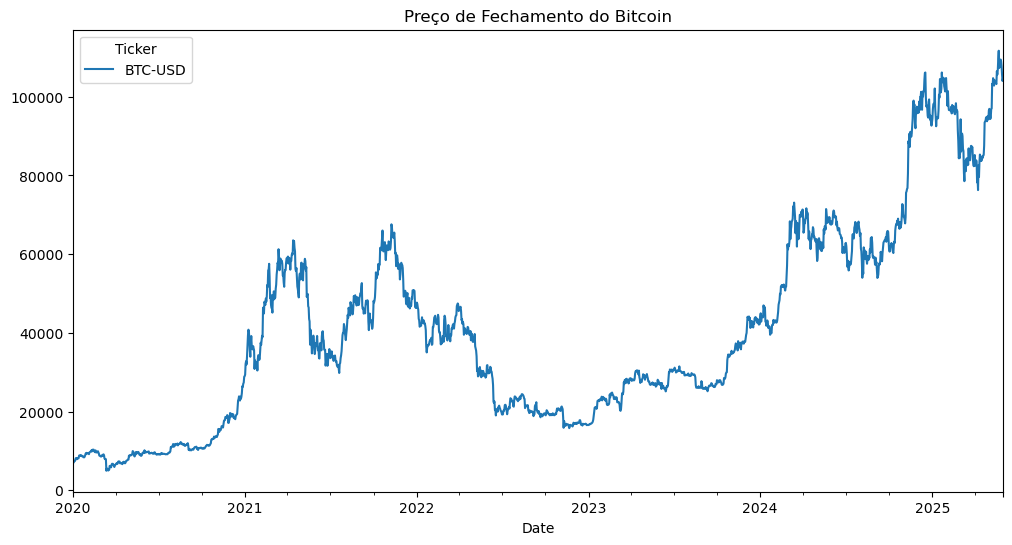

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt

btc = yf.download("BTC-USD", start="2020-01-01", end="2025-06-01")
btc["Close"].plot(figsize=(12,6))
plt.title("Preço de Fechamento do Bitcoin")
plt.show()

In [6]:
btc.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


In [7]:
btc.describe()


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,1978.000000,1978.000000,1978.000000,1978.000000,1.978000e+03
mean,40729.779829,41551.554238,39778.521011,40682.707365,3.394865e+10
std,25559.709644,26035.535386,25008.268418,25531.525523,1.986244e+10
min,4970.788086,5331.833984,4106.980957,5002.578125,5.331173e+09
25%,20487.898438,20870.595703,20070.524414,20475.809082,2.089563e+10
50%,35954.349609,37241.009766,34746.777344,35881.457031,3.040638e+10
75%,58176.022461,59460.265625,56919.938477,58172.461914,4.138087e+10
max,111673.281250,111970.171875,109285.070312,111679.359375,3.509679e+11


In [8]:
btc.to_csv("bitcoin_dados.csv")


In [9]:
!pip install mplfinance
import mplfinance as mpf
mpf.plot(btc, type='candle', style='charles', volume=True)


ValueError: Data for column "Open" must be ALL float or int.

In [10]:
print(btc.dtypes)



Price   Ticker 
Close   BTC-USD    float64
High    BTC-USD    float64
Low     BTC-USD    float64
Open    BTC-USD    float64
Volume  BTC-USD      int64
dtype: object


In [11]:
btc = btc.dropna()


In [12]:
import mplfinance as mpf
mpf.plot(btc, type='candle', style='charles', volume=True)


ValueError: Data for column "Open" must be ALL float or int.

In [13]:
print(btc.dtypes)


Price   Ticker 
Close   BTC-USD    float64
High    BTC-USD    float64
Low     BTC-USD    float64
Open    BTC-USD    float64
Volume  BTC-USD      int64
dtype: object


In [14]:
btc.columns = btc.columns.get_level_values(0)  # pega apenas o primeiro nível do índice


In [15]:
print(btc.head())
print(btc.dtypes)


Price             Close         High          Low         Open       Volume
Date                                                                       
2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090  18565664997
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032
2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488  18444271275
2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660  19725074095
Price
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object


In [16]:
import yfinance as yf
import mplfinance as mpf

# Baixar os dados
btc = yf.download("BTC-USD", start="2020-01-01", end="2023-08-01")

# Se houver MultiIndex nas colunas, "achatar" para colunas simples
if isinstance(btc.columns, pd.MultiIndex):
    btc.columns = btc.columns.get_level_values(-1)  # pega o último nível, geralmente 'Open','High', etc.

# Remover linhas com valores faltantes
btc = btc.dropna()

# Conferir colunas
print(btc.head())
print(btc.dtypes)

# Plotar candlestick
mpf.plot(btc, type='candle', style='charles', volume=True)


C:\Users\guiga\AppData\Local\Temp\ipykernel_1084\2260908431.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download("BTC-USD", start="2020-01-01", end="2023-08-01")
[*********************100%***********************]  1 of 1 completed

Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD      BTC-USD
Date                                                                       
2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090  18565664997
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032
2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488  18444271275
2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660  19725074095
Ticker
BTC-USD    float64
BTC-USD    float64
BTC-USD    float64
BTC-USD    float64
BTC-USD      int64
dtype: object


ValueError: Column "Open" NOT FOUND in Input DataFrame!
            CHECK that your column names are correct AND/OR
            CHECK for leading or trailing blanks in your column names.

C:\Users\guiga\AppData\Local\Temp\ipykernel_1084\42301439.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download("BTC-USD", start="2025-04-01", end="2025-06-01")
[*********************100%***********************]  1 of 1 completed


                   Close          High           Low          Open  \
Date                                                                 
2025-04-01  85169.171875  85487.367188  82429.359375  82551.921875   
2025-04-02  82485.710938  88466.953125  82343.539062  85180.609375   
2025-04-03  83102.828125  83909.296875  81282.101562  82487.476562   
2025-04-04  83843.804688  84696.148438  81670.750000  83100.250000   
2025-04-05  83504.796875  84207.015625  82377.734375  83844.703125   

                 Volume  
Date                     
2025-04-01  28175650319  
2025-04-02  47584398470  
2025-04-03  36852112080  
2025-04-04  45157640207  
2025-04-05  14380803631  
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object


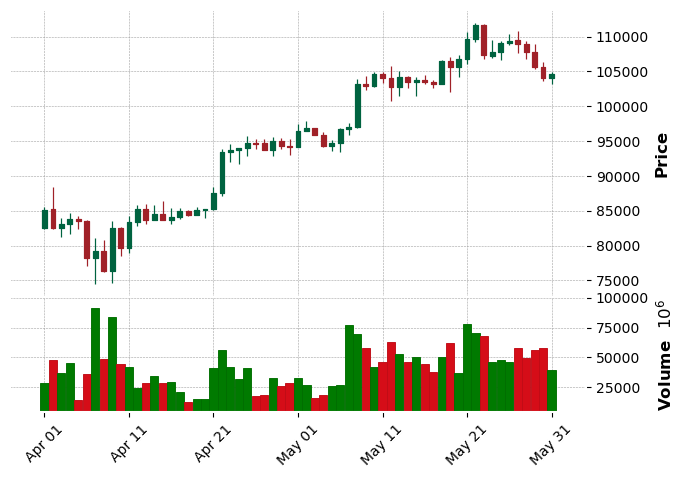

In [21]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf

# Baixar os dados
btc = yf.download("BTC-USD", start="2025-04-01", end="2025-06-01")

# Achatar MultiIndex
if isinstance(btc.columns, pd.MultiIndex):
    btc.columns = [col[0] for col in btc.columns]  # pega o nível correto
btc = btc.rename(columns={
    'Open': 'Open',
    'High': 'High',
    'Low': 'Low',
    'Close': 'Close',
    'Adj Close': 'Adj Close',
    'Volume': 'Volume'
})

# Remover linhas com NaN
btc = btc.dropna()

# Conferir colunas
print(btc.head())
print(btc.dtypes)

# Plotar candlestick
mpf.plot(btc, type='candle', style='charles', volume=True)
